In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# Create the engine for the database.
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [31]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x130f420c130>,
 'prcp': 0.08,
 'id': 1,
 'date': '2010-01-01',
 'station': 'USC00519397',
 'tobs': 65.0}

In [32]:
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x130f445c100>,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'elevation': 3.0,
 'latitude': 21.2716,
 'id': 1}

# Exploratory Climate Analysis

<AxesSubplot:xlabel='date'>

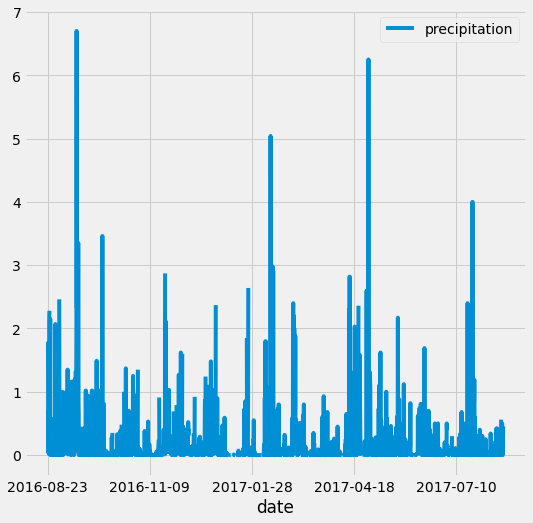

In [20]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
#print(results)

# Save the query results as a Pandas DataFrame and set the index to the date column
weather_df = pd.DataFrame(results, columns = ["date", "precipitation"])

# Sort the dataframe by date
weather_df.set_index(weather_df["date"], inplace= True)

weather_df = weather_df.sort_index()

#print(weather_df.to_string(index = False))

# Use Pandas Plotting with Matplotlib to plot the data
weather_df.plot(figsize = (8,8))


In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data
weather_df.describe().round(4)

,precipitation
count,2021.0000
mean,0.1773
std,0.4612
min,0.0000
25%,0.0000
50%,0.0200
75%,0.1300
max,6.7000


In [24]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9,)]

In [30]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [36]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()

[(54.0, 85.0, 71.66378066378067)]

In [38]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).filter(Measurement.date >= prev_year).all()

print(results)

[(81.0,), (79.0,), (80.0,), (79.0,), (77.0,), (78.0,), (78.0,), (79.0,), (80.0,), (81.0,), (80.0,), (79.0,), (75.0,), (79.0,), (76.0,), (76.0,), (80.0,), (79.0,), (78.0,), (76.0,), (78.0,), (78.0,), (75.0,), (79.0,), (80.0,), (79.0,), (81.0,), (77.0,), (77.0,), (78.0,), (76.0,), (82.0,), (81.0,), (78.0,), (80.0,), (80.0,), (79.0,), (80.0,), (80.0,), (80.0,), (79.0,), (79.0,), (79.0,), (80.0,), (80.0,), (79.0,), (78.0,), (76.0,), (75.0,), (80.0,), (80.0,), (79.0,), (80.0,), (79.0,), (78.0,), (78.0,), (80.0,), (81.0,), (79.0,), (77.0,), (79.0,), (78.0,), (77.0,), (77.0,), (78.0,), (77.0,), (78.0,), (77.0,), (76.0,), (77.0,), (77.0,), (77.0,), (77.0,), (77.0,), (76.0,), (75.0,), (71.0,), (71.0,), (71.0,), (71.0,), (72.0,), (71.0,), (72.0,), (77.0,), (77.0,), (77.0,), (77.0,), (77.0,), (75.0,), (76.0,), (76.0,), (75.0,), (72.0,), (74.0,), (75.0,), (73.0,), (76.0,), (75.0,), (68.0,), (75.0,), (75.0,), (72.0,), (69.0,), (71.0,), (68.0,), (67.0,), (69.0,), (73.0,), (70.0,), (70.0,), (70.0,), 

In [41]:
# Create a dataframe.
station_df = pd.DataFrame(results, columns = ["tobs"])
print(station_df)

      tobs
0     81.0
1     79.0
2     80.0
3     79.0
4     77.0
...    ...
2225  71.0
2226  78.0
2227  76.0
2228  76.0
2229  76.0

[2230 rows x 1 columns]


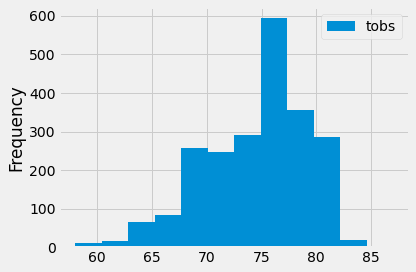

In [43]:
station_df.plot.hist(bins = 12)
plt.tight_layout() # Compress the x axis labels so that they fit into the plot.

In [47]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
calc_temps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.date >= "2016-09-03").filter(Measurement.date <= "2016-12-03").all()

print(calc_temps)

[(63.0, 84.0, 76.30981067125646)]


# Challenge

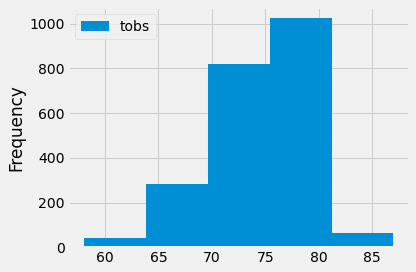

In [48]:
station_df.plot.hist(bins = 5)
plt.tight_layout()

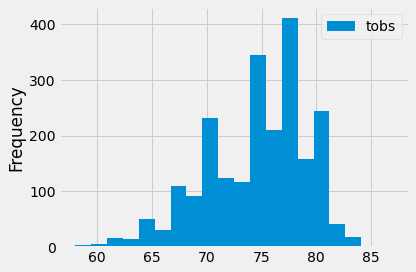

In [49]:
station_df.plot.hist(bins = 20)
plt.tight_layout()